In [1]:
!pip install scikit-learn==1.0.2

     |████████████████████████████████| 7.9 MB 7.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


# Classfication with iris data

## Iris Data

### Features
- Sepal length
- Sepal width
- Petal length
- Petal width

### label
- Setosa
- Vesicolor
- Virginica

In [28]:
from sklearn.datasets import load_iris # Load iris data
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # Divide into train and test data

In [29]:
import pandas as pd

# Load iris set
iris = load_iris()

iris_data = iris.data

iris_label = iris.target
print('iris target value:', iris_label)
print('iris target name:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target value: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 0 : Setosa
- 1 : versicolor
- 2 : virginica

In [30]:
# Divide into train and test
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

# Create DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [31]:
pred = dt_clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print('Prediction Accuracy : {0:4f}'.format(accuracy_score(y_test, pred)))

Prediction Accuracy : 0.933333


### Process

1. Divide into train data and test data
2. Train a model
3. Predict target value
4. Evaluate model accuracy

# Framework based on Scikit-learn

- Use fit() to train a model
- Use predict() to predict target value
- Estimator Class : Classifier + Regressor

### Major modules in Scikit-learn

#### Example data
- sklearn.datasets

#### Feature processing
- sklearn.preprocessing
- sklearn.feature_selection
- sklearn.feature_extraction

#### Feature processing & Dimension reduction
- sklearn.decomposition

#### Divide and Verification data & Tuning parameters
- sklearn.model_selection

#### Evaluation
- sklearn.metrics

#### ML Algorithm
- sklearn.ensemble
- sklearn.linear_model
- sklearn.naive_bayes
- sklearn.neighbors
- sklearn.svm
- sklearn.tree
- sklearn.cluster

#### Utility
- sklearn.pipeline

# Cross validation

## K-Fold Cross Validation

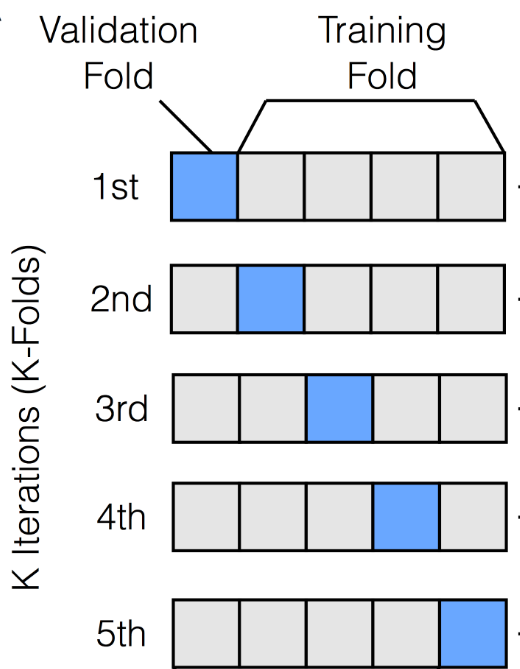

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
features.shape[0]

150

In [34]:
n_iter = 0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter ++ 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} cross validation accuracy: {1}, train data size: {2}, test data size: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} validation set index:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
print('\n## Average validation accuracy:', np.mean(cv_accuracy))


#0 cross validation accuracy: 1.0, train data size: 120, test data size: 30
#0 validation set index:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#0 cross validation accuracy: 0.9667, train data size: 120, test data size: 30
#0 validation set index:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#0 cross validation accuracy: 0.8667, train data size: 120, test data size: 30
#0 validation set index:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#0 cross validation accuracy: 0.9333, train data size: 120, test data size: 30
#0 validation set index:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#0 cross validation accuracy: 0.7333, train data size: 120, test data size: 30
#0 validation set index:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139

## GridSearchCV - Cross validation and hyper parameter tuning

### major parameter
- estimator : classifier, regressor, pipeline
- param_grid : dictionary, parameter value
- scoring : estimate method
- cv : train/test set count
- refit : True (Find } hyper parameter and Retrain the estimator object)

In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [36]:
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- params : Each hyper parameter values
- rank_test_score : Test score rank
- mean_test_score : Mean value of test scores

In [37]:
print('GridSearchCV optimum parameter:', grid_dtree.best_params_)
print('GridSearchCV best accuracy:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV optimum parameter: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV best accuracy:0.9750


In [38]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('test data set accuracy:{0:.4f}'.format(accuracy_score(y_test,pred)))

test data set accuracy:0.9667
